In [44]:
import numpy as np
import pandas as pd

In [45]:
df=pd.read_csv("iris.csv",index_col=0)

In [46]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
df.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [48]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
unique=df["Species"].unique()

In [50]:
unique

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Species"]=le.fit_transform(df["Species"])

In [52]:
df["Species"].unique()

array([0, 1, 2])

In [53]:
import matplotlib.pyplot as plt
import seaborn as sn

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SepalWidthCm'>

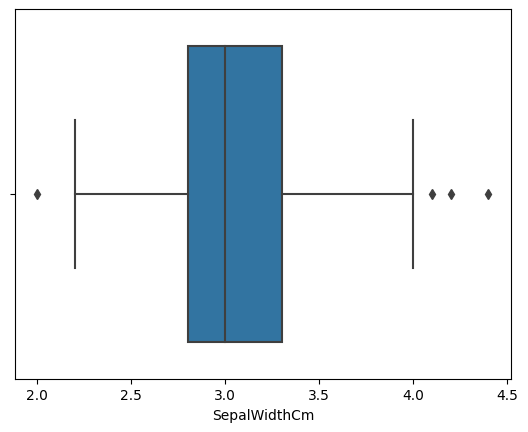

In [54]:
sn.boxplot(x="SepalWidthCm",data=df)

In [55]:
df.shape

(150, 5)

In [56]:
df=df.drop(df[(df["SepalWidthCm"]>4) & (df["SepalWidthCm"]<2) ].index)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SepalWidthCm'>

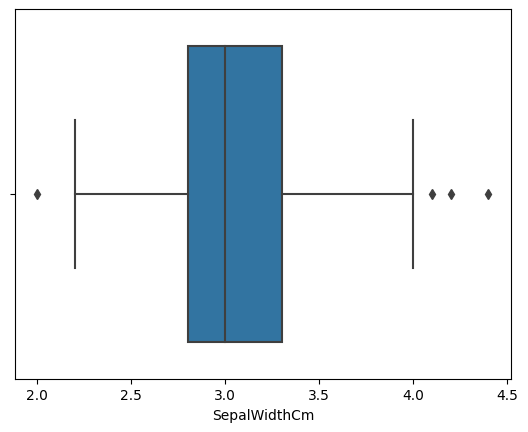

In [57]:
sn.boxplot(x="SepalWidthCm",data=df)

In [58]:
q1=np.percentile(df["SepalWidthCm"],25,interpolation="midpoint")
q3=np.percentile(df["SepalWidthCm"],75,interpolation="midpoint")

In [59]:
iqr=q3-q1

In [60]:
lq=q1-1.5*iqr
up=q3+1.5*iqr

In [61]:
df.shape

(150, 5)

In [62]:
df=df.drop(df[df["SepalWidthCm"]<lq].index)

In [63]:
df.shape

(149, 5)

In [64]:
df=df.drop(df[df["SepalWidthCm"]>up].index)

In [65]:
df.shape

(146, 5)

In [66]:
df["SepalWidthCm"].skew()

0.14081170828794973

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='SepalWidthCm'>

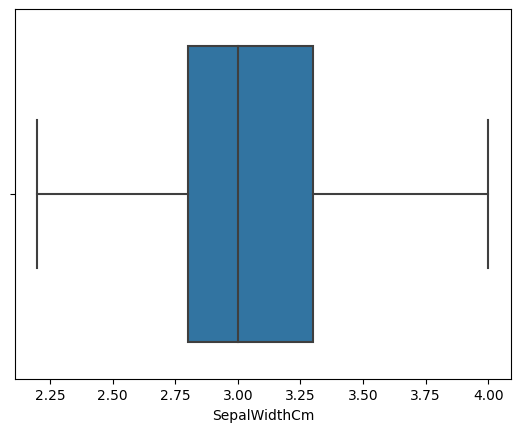

In [67]:
sn.boxplot(x="SepalWidthCm",data=df)

In [68]:
df['SepalWidthCm'].kurt()

-0.24327514667496075

In [70]:
df_species=df.groupby("Species")

In [71]:
df_species.size()

Species
0    47
1    49
2    50
dtype: int64

In [72]:
arr=df.values

In [73]:
arr[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

In [75]:
from sklearn.linear_model import LinearRegression

In [77]:
lr=LinearRegression()

In [101]:
x=arr[:,0:4]
y=arr[:,4]

In [102]:
x[0]

array([5.1, 3.5, 1.4, 0.2])

In [103]:
xt=df.drop("Species",axis=1)
yt=df["Species"]

In [104]:
xt.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [105]:
yt.head()

Id
1    0
2    0
3    0
4    0
5    0
Name: Species, dtype: int32

In [107]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=5)

In [108]:
lr.fit(x_train,y_train)

LinearRegression()

In [109]:
lr.score(x_test,y_test)

0.9088006533372902

## Now let us try some Hyper paramter tuning using GridSearch CV

In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [117]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [143]:
def best_algo(x,y):
    algos={
        #"linear regression":{
          #  "model":LinearRegression(),
           # "params":{"normalize":[True,False]}
       # },
        "svm":{
            "model":svm.SVC(),
            "params":{"gamma":["auto","scale"],"kernel":["rbf","poly"]}
        },
        "lasso":{
            "model":Lasso(),
            "params":{"alpha":[1,2],"selection":["random","cyclic"]},
        },
        "decision tree":{
            "model":DecisionTreeRegressor(random_state=42,max_depth=3, min_samples_split=5, min_samples_leaf=2),
            "params":{"criterion":["mse","friedman_mse"],"splitter":["best","random"]}
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for name,config in algos.items():
        gs=GridSearchCV(config["model"],config["params"],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({"model":name,
                     "best_score":gs.best_score_,
                    "best_params":gs.best_params_})
    return pd.DataFrame(scores,columns=["model","best_score","best_params"])
    

In [144]:
best_model=best_algo(x,y)

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py

In [145]:
best_model

,model,best_score,best_params
0,svm,0.993333,"{'gamma': 'auto', 'kernel': 'rbf'}"
1,lasso,0.374616,"{'alpha': 1, 'selection': 'random'}"
2,decision tree,0.958201,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
